# Nuclear Instrumentation
## Solid State Detector

Karina Chiñas Fuentes

Student Nummer: 02118434

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import scipy.constants as spc
import pylab as pl
import seaborn as sns
import pandas as pd


from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

sstyle = "paper"
sns.set_context(sstyle)
sns.set_style("whitegrid")
plt.rc('font',family = 'serif')

qe = spc.elementary_charge # C
mp = spc.proton_mass       # kg
me = spc.electron_mass     # kg
ε0 = spc.epsilon_0         # F/m
c  = spc.speed_of_light    # m/s

np.random.seed(7)

Consider the following 

* A circular source with a radius of 40 mm is present in the x-y plane, centered at the origin. Each point of the source emits alpha particles isotropically and the intensity over the surface of the source is constant.
* A circular solid state detector has a radius of 60 mm and is positioned such that its circular entrance window is parallel with the circular source, and at a distance of 70 mm from the source. The detector is centered on the z-axis.

<img src="Figures/P2_setup.jpeg"/>

**Task:**
Develop a Monte Carlo simulation to determine the solid angle of the system.

1. What is the solid angle (in steradians) of the geometry described above?
2. Check that, if you make the radius of the source very small in your code, the point source value of the solid angle is found.
3. What is the value of the solid angle if the detector is partially covered by a thin plate which stops alpha-particles, having a square opening with a diagonal of 75% of the diameter of the detector and of which the centre coincides with the centre of the detector?
4. What typical amount of particles do you have to emit in your simulation to obtain an accurate result (i.e. standard deviation of the order of 0,5 %) ? How did you determine this amount?
5. Did you improve the efficiency of the calculation and how? 

---
$$
    x = r\cdot cos(\varphi); \:\:
    z = r\cdot sin(\varphi)
$$

In [2]:
Rdetect = 60       # mm
Rsource = 40       # mm
pos_detector = 70  # mm
N = 1700

In [3]:
φ = 2*np.pi*np.random.rand(N)
r = np.random.rand(N) + np.random.rand(N)
index_ = np.where(r>1)
r[index_] = 2-r[index_] 
r = Rsource*r

x = r*np.cos(φ)
z = r*np.sin(φ)

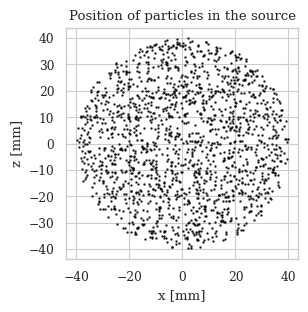

In [4]:
plt.close()
plt.figure(figsize=(3,3))
plt.scatter(x,z,s=1, c="k", alpha=0.7)
plt.xlabel("x [mm]")
plt.ylabel("z [mm]")
plt.title("Position of particles in the source");

In [5]:
# Storing the source points in a dataframe
df = pd.DataFrame(x, columns=["sX"])
df["sY"] = [0]*N
df["sZ"] = z

$$
    x = rsin(\theta)cos(\varphi); \:\:
    y = rcos(\theta)sin(\varphi); \:\: 
    z = rcos(\theta)
$$

In [6]:
#θ = np.pi*np.random.rand(N)
θ = np.arccos(2*np.random.rand(N) - 1)
φ = np.pi*np.random.rand(N)

x = Rsource*np.sin(θ)*np.cos(φ)
y = Rsource*np.sin(θ)*np.sin(φ)
z = Rsource*np.cos(θ)

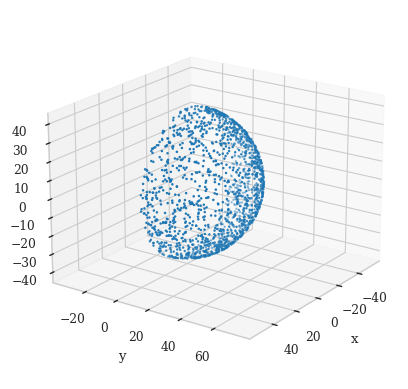

In [7]:
#%matplotlib notebook

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(x, y, z, s=1)
ax.set_aspect('equal')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.view_init(20, 35);

In [8]:
# Storing the reference directive points in the dataframe
df["rX"] = x
df["rY"] = y
df["rZ"] = z

# Storing the points to parameterize a line in the dataframe
df["dX"] = df["rX"] - df["sX"]
df["dY"] = df["rY"] - df["sY"]
df["dZ"] = df["rZ"] - df["sZ"]

# Computing the positions of the emitted particle at a
# distance where the detector is positioned.
df["dVEC"] = df[df.columns[-3:]].values.tolist()
df["sVEC"] = df[df.columns[:3]].values.tolist()
df["data"] = df[["sVEC","dVEC"]].apply(tuple, axis=1) 

def point_at_dect_pos(data):
    sVEC, dVEC = data
    t = (pos_detector - sVEC[1])/dVEC[1]
    point = np.array(sVEC) + np.array(dVEC)*t
    return point

data = df["data"].apply(point_at_dect_pos).values
X = np.array(list(map(lambda x: x[0], data)))
Z = np.array(list(map(lambda x: x[2], data)))

r = np.sqrt(np.square(X) + np.square(Z))
hit_index = np.where(r<=Rdetect)[0]
Nhit = len(hit_index)

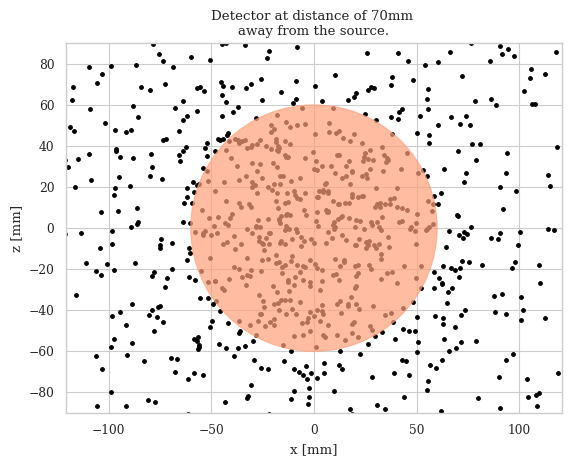

In [9]:
plt.close()
scl = 1.5
plt.scatter(X,Z,c="k",s=7)
circle1 = plt.Circle((0, 0), Rdetect, color="lightsalmon", alpha=0.7)
plt.gca().add_patch(circle1)
plt.axis("equal")
plt.xlim([-Rdetect*scl, Rdetect*scl])
plt.ylim([-Rdetect*scl, Rdetect*scl])
plt.xlabel("x [mm]")
plt.ylabel("z [mm]")
plt.title(f"Detector at distance of {pos_detector}mm \naway from the source.")
plt.show()